# 1: regression analysis

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

# load the dataset
url='https://drive.google.com/file/d/1C3Lwh_lQwpJQAkT-ls3IR87Fq3M_JOPI/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url2,names=['lift_kg','putt_m']);  

## linear regression

In [ ]:
xy=df.to_numpy()
X=xy[:,0]
y=xy[:,1]

In [ ]:
m=(np.sum((X-np.mean(X))*y))/(np.sum(X*X)-(len(X)*((np.mean(X))**2)))
b=np.sum(y/len(X)) - m*np.mean(X)
y_pred=m*X+b
SSR=np.sum(np.square(y-y_pred))

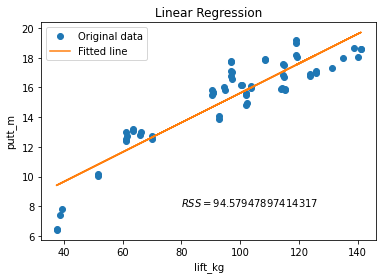

In [ ]:
p1=plt.plot(X,y,'o',label='Original data')
p1=plt.plot(X,m*X+b,label='Fitted line')
p1=plt.legend()
p1=plt.xlabel('lift_kg')
p1=plt.ylabel('putt_m')
p1=plt.title('Linear Regression')
p1=plt.text(80, 8, r'$RSS=94.57947897414317$')
plt.show()

In [ ]:
get_les(lin_reg,X)

94.57947897414317

## polynomial regression

In [ ]:
X=xy[:,0]
y=np.transpose(xy[:,1])
X = np.c_[np.ones(X.shape[0]), X,  X**2, X**3]

# Compute beta
Xt = np.transpose(X)
XtX = np.dot(Xt,X)
Xty = np.dot(Xt,y)
beta = np.linalg.solve(XtX,Xty)
print(beta)

y_pred=np.dot(X,beta)
SSR=np.dot((y-y_pred).T,(y-y_pred))

[-9.40577764e+00  5.89406408e-01 -4.67881757e-03  1.34768361e-05]


44.572910959550626

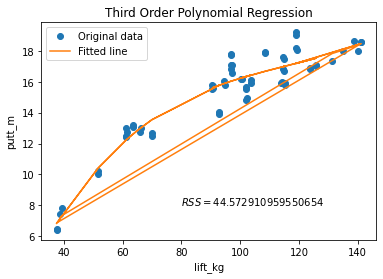

In [ ]:
X=xy[:,0]
# plot of the best polynomial fit
p3=plt.plot(X,y,'o',label='Original data')
p3=plt.plot(X,y_pred,label='Fitted line')
p3=plt.xlabel('lift_kg')
p3=plt.ylabel('putt_m')
p3=plt.title('Third Order Polynomial Regression')
p3=plt.text(80, 8, r'$RSS=44.572910959550654$')
p3=plt.legend()
plt.show()

In [ ]:
xy=df.to_numpy()
X=xy[:,0].reshape(-1,1)
y=xy[:,1]

In [ ]:
# program to compute a least square solution
def get_les(reg,X_input):
    y_pred=reg.predict(X_input)
    LES=np.sum(np.square(y-y_pred))
    return LES

Text(0, 0.5, 'SSR')

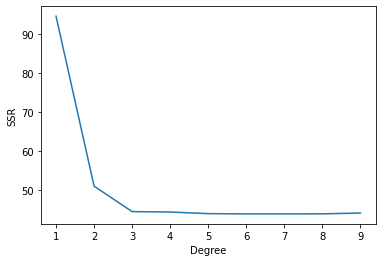

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

les=[]
min_les,min_deg=0,0
degrees=np.arange(1,10)
for deg in degrees:
    poly_features=PolynomialFeatures(degree=deg,include_bias=False)
    X_poly=poly_features.fit_transform(X)
    poly_reg=LinearRegression()
    poly_reg.fit(X_poly,y)

    poly_les=get_les(poly_reg,X_poly)
    les.append(poly_les)

fig=plt.figure()
p2=fig.add_subplot(111)
p2.plot(degrees,les)
p2.set_xlabel('Degree')
p2.set_ylabel('SSR')

In [ ]:
les # We can conclude that the best degree is 3

[94.57947897414317,
 51.08105739795001,
 44.572910959550654,
 44.46511181423206,
 44.049261058429806,
 43.980538282985414,
 43.98035999271473,
 44.002685522435904,
 44.19732713212257]

## logistic regression

In [ ]:
df['putt_m']=round(df['putt_m'])

In [ ]:
df.head()

,lift_kg,putt_m
0,37.5,6.0
1,51.5,10.0
2,61.3,12.0
3,61.3,13.0
4,63.6,13.0


In [ ]:
x=df.drop('putt_m',axis=1)
y=df['putt_m']

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg=LogisticRegression(solver='newton-cg',multi_class='multinomial')
log_reg.fit(x,y)
y_pred=log_reg.predict(x)

In [ ]:
get_les(log_reg,x)

58.0

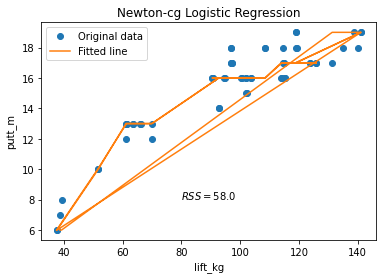

In [ ]:
p4=plt.plot(x,y,'o',label='Original data')
p4=plt.plot(x,y_pred,label='Fitted line')
p4=plt.legend()
p4=plt.xlabel('lift_kg')
p4=plt.ylabel('putt_m')
p4=plt.title('Newton-cg Logistic Regression')
p4=plt.text(80, 8, r'$RSS=58.0$')
plt.show()

multinomial logistic regression fits data better than linear regression but worse than polynomial regression